In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e12/sample_submission.csv
/kaggle/input/playground-series-s4e12/train.csv
/kaggle/input/playground-series-s4e12/test.csv


In [2]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv") 
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [5]:
train_df.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [6]:
train_df.duplicated().sum()

0

In [7]:
# Save 'id' column for submission
test_ids = test_df['id']

# Define the target column
target_column = 'Premium Amount'

# Select categorical and numerical columns (initial)
categorical_columns = train_df.select_dtypes(include=['object']).columns
numerical_columns = train_df.select_dtypes(exclude=['object']).columns

# Print out column information
print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: Premium Amount

Categorical Columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

Numerical Columns: ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']


In [8]:
train_df['Gender'] = train_df['Gender'].replace({'Male':0, 'Female':1})
test_df['Gender'] = test_df['Gender'].replace({'Male':0, 'Female':1})

/tmp/ipykernel_17/1653374538.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Gender'] = train_df['Gender'].replace({'Male':0, 'Female':1})
/tmp/ipykernel_17/1653374538.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Gender'] = test_df['Gender'].replace({'Male':0, 'Female':1})


In [9]:
train_df[categorical_columns].nunique()

Gender                     2
Marital Status             3
Education Level            4
Occupation                 3
Location                   3
Policy Type                3
Policy Start Date     167381
Customer Feedback          3
Smoking Status             2
Exercise Frequency         4
Property Type              3
dtype: int64

In [10]:
# Print top 10 unique value counts for each categorical column
for column in categorical_columns:
    print(f"\nTop value counts in '{column}':\n{train_df[column].value_counts().head(10)}")


Top value counts in 'Gender':
Gender
0    602571
1    597429
Name: count, dtype: int64

Top value counts in 'Marital Status':
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64

Top value counts in 'Education Level':
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

Top value counts in 'Occupation':
Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

Top value counts in 'Location':
Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64

Top value counts in 'Policy Type':
Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64

Top value counts in 'Policy Start Date':
Policy Start Date
2020-02-08 15:21:39.134960    142
2023-08-13 15:21:39.155231    137
2022-02-02 15:21:39.134960    137
2022-08-30 15:21:39.134960  

In [11]:
print(train_df[numerical_columns].nunique())

id                      1200000
Age                          47
Annual Income             88593
Number of Dependents          5
Health Score             532657
Previous Claims              10
Vehicle Age                  20
Credit Score                550
Insurance Duration            9
Premium Amount             4794
dtype: int64


In [12]:
print(train_df[categorical_columns].nunique())

Gender                     2
Marital Status             3
Education Level            4
Occupation                 3
Location                   3
Policy Type                3
Policy Start Date     167381
Customer Feedback          3
Smoking Status             2
Exercise Frequency         4
Property Type              3
dtype: int64


In [13]:
print(train_df[numerical_columns].isnull().sum())

id                           0
Age                      18705
Annual Income            44949
Number of Dependents    109672
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Premium Amount               0
dtype: int64


In [14]:
print(train_df[categorical_columns].isnull().sum())

Gender                     0
Marital Status         18529
Education Level            0
Occupation            358075
Location                   0
Policy Type                0
Policy Start Date          0
Customer Feedback      77824
Smoking Status             0
Exercise Frequency         0
Property Type              0
dtype: int64


In [15]:
numerical_columns_test=test_df.select_dtypes(include=['float']).columns
numerical_columns_test
print(test_df[numerical_columns_test].isnull().sum())

Age                      12489
Annual Income            29860
Number of Dependents     73130
Health Score             49449
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
dtype: int64


In [16]:
categorical_columns_test=test_df.select_dtypes(include=['object']).columns
print(test_df[categorical_columns_test].isnull().sum())

Marital Status         12336
Education Level            0
Occupation            239125
Location                   0
Policy Type                0
Policy Start Date          0
Customer Feedback      52276
Smoking Status             0
Exercise Frequency         0
Property Type              0
dtype: int64


In [17]:
train_df[numerical_columns] = train_df[numerical_columns].fillna(train_df[numerical_columns].mean())
test_df[numerical_columns_test] = test_df[numerical_columns_test].fillna(test_df[numerical_columns_test].mean())

In [18]:
train_df.isnull().sum()


id                           0
Age                          0
Gender                       0
Annual Income                0
Marital Status           18529
Number of Dependents         0
Education Level              0
Occupation              358075
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims              0
Vehicle Age                  0
Credit Score                 0
Insurance Duration           0
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [19]:
test_df.isnull().sum()

id                           0
Age                          0
Gender                       0
Annual Income                0
Marital Status           12336
Number of Dependents         0
Education Level              0
Occupation              239125
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims              0
Vehicle Age                  0
Credit Score                 0
Insurance Duration           0
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [20]:
train_df= train_df.drop(['Marital Status','Policy Start Date','Customer Feedback','Education Level'], axis=1)
test_df= test_df.drop(['Marital Status','Policy Start Date','Customer Feedback','Education Level'], axis=1)

In [21]:
train_df.head()

,id,Age,Gender,Annual Income,Number of Dependents,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,1,10049.0,1.0,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.00000,5.0,No,Weekly,House,2869.0
1,1,39.0,1,31678.0,3.0,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.00000,2.0,Yes,Monthly,House,1483.0
2,2,23.0,0,25602.0,3.0,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,592.92435,3.0,Yes,Weekly,House,567.0
3,3,21.0,0,141855.0,2.0,NaN,10.938144,Rural,Basic,1.0,0.0,367.00000,1.0,Yes,Daily,Apartment,765.0
4,4,21.0,0,39651.0,1.0,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.00000,4.0,Yes,Weekly,House,2022.0


In [22]:
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)


In [23]:
train_df.head()

,id,Age,Gender,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,...,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,0,19.0,1,10049.0,1.0,22.598761,2.0,17.0,372.00000,5.0,...,False,True,False,True,False,False,False,True,False,True
1,1,39.0,1,31678.0,3.0,15.569731,1.0,12.0,694.00000,2.0,...,False,False,True,False,True,True,False,False,False,True
2,2,23.0,0,25602.0,3.0,47.177549,1.0,14.0,592.92435,3.0,...,True,False,False,True,True,False,False,True,False,True
3,3,21.0,0,141855.0,2.0,10.938144,1.0,0.0,367.00000,1.0,...,False,False,False,False,True,False,False,False,False,False
4,4,21.0,0,39651.0,1.0,20.376094,0.0,8.0,598.00000,4.0,...,False,False,False,True,True,False,False,True,False,True


In [24]:
train_df.isnull().sum()

id                            0
Age                           0
Gender                        0
Annual Income                 0
Number of Dependents          0
Health Score                  0
Previous Claims               0
Vehicle Age                   0
Credit Score                  0
Insurance Duration            0
Premium Amount                0
Occupation_Self-Employed      0
Occupation_Unemployed         0
Location_Suburban             0
Location_Urban                0
Policy Type_Comprehensive     0
Policy Type_Premium           0
Smoking Status_Yes            0
Exercise Frequency_Monthly    0
Exercise Frequency_Rarely     0
Exercise Frequency_Weekly     0
Property Type_Condo           0
Property Type_House           0
dtype: int64

In [25]:
test_df.isnull().sum()

id                            0
Age                           0
Gender                        0
Annual Income                 0
Number of Dependents          0
Health Score                  0
Previous Claims               0
Vehicle Age                   0
Credit Score                  0
Insurance Duration            0
Occupation_Self-Employed      0
Occupation_Unemployed         0
Location_Suburban             0
Location_Urban                0
Policy Type_Comprehensive     0
Policy Type_Premium           0
Smoking Status_Yes            0
Exercise Frequency_Monthly    0
Exercise Frequency_Rarely     0
Exercise Frequency_Weekly     0
Property Type_Condo           0
Property Type_House           0
dtype: int64

In [26]:
# Separate features (X) and target (y)
X = train_df.drop(columns=['Premium Amount'])  # Drop the target
y = train_df['Premium Amount']  # Target variable

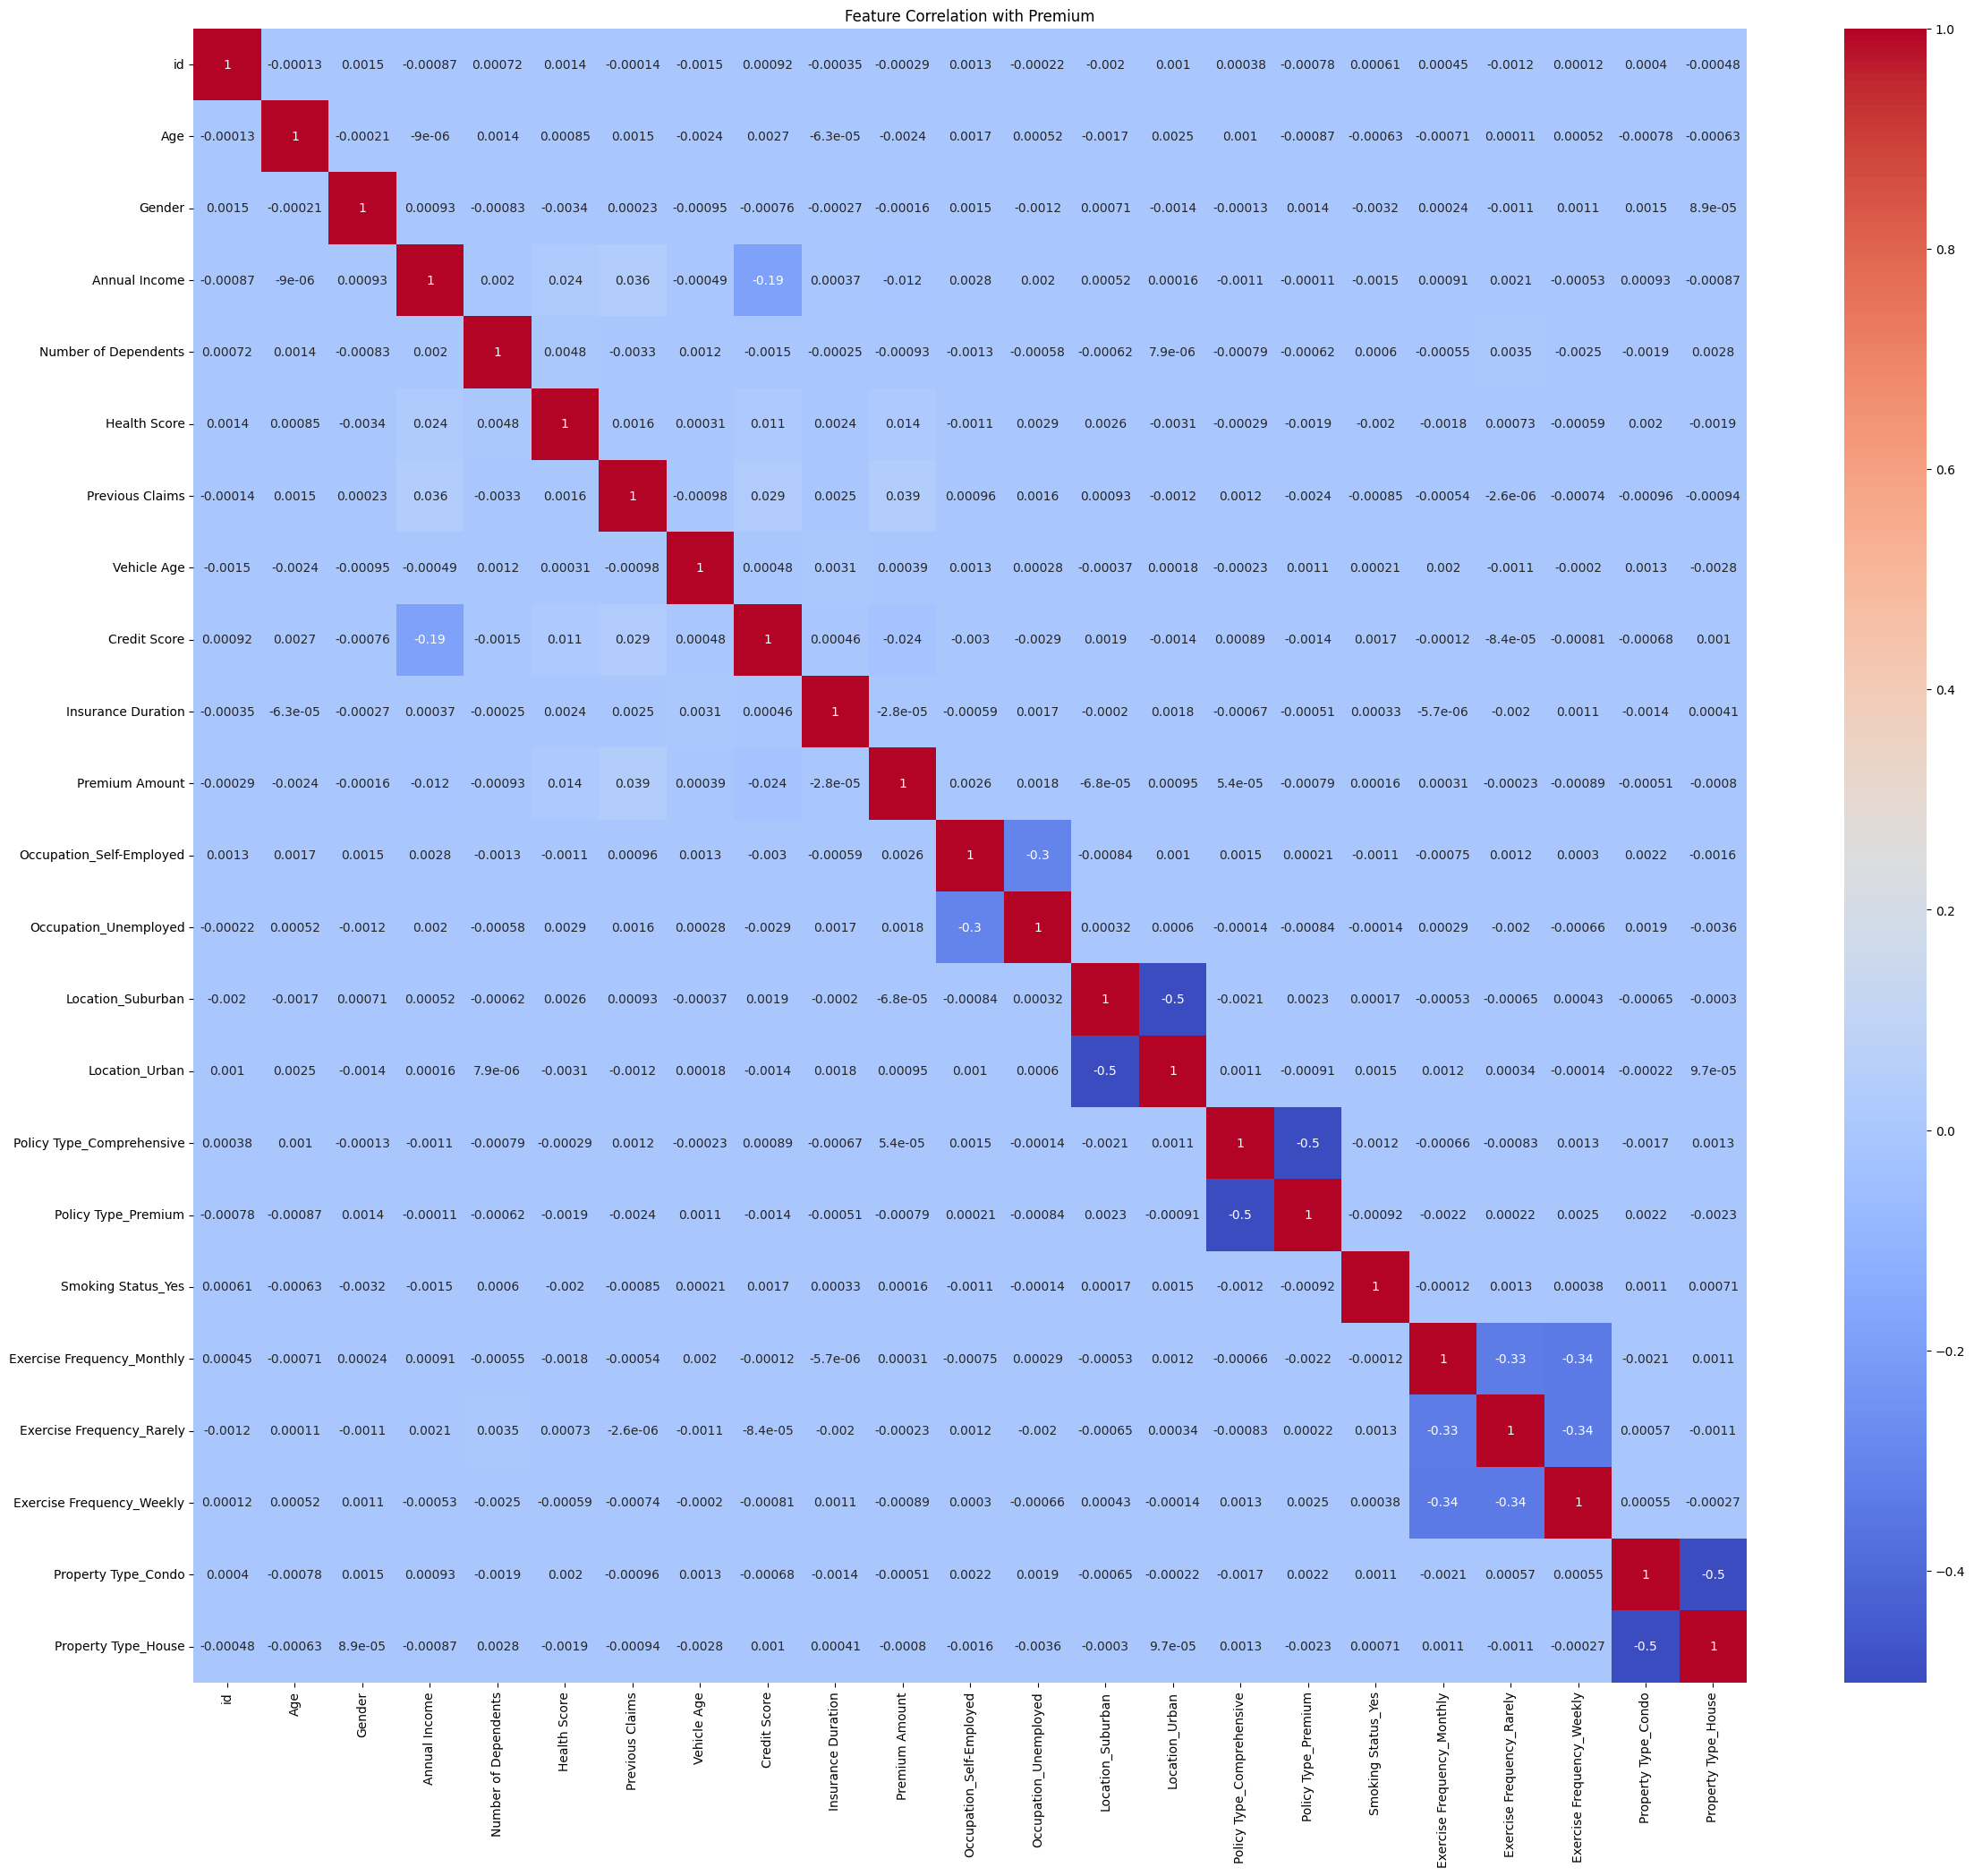

In [27]:
plt.figure(figsize=(28, 24))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Premium')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


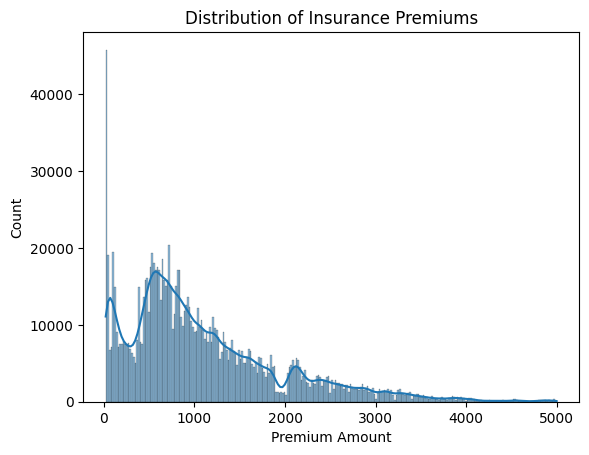

In [28]:
import seaborn as sns
# Distribution of target variable
sns.histplot(y, kde=True)
plt.title('Distribution of Insurance Premiums')
plt.show()

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Scale numerical features (standardize features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [31]:
from sklearn.linear_model import LinearRegression

# Initialize model
lr_model = LinearRegression()

In [32]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Make predictions
y_pred = lr_model.predict(X_val)

In [34]:
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mse, mae, r2

(745266.3516719901, 667.2769716252797, 0.002702092064760464)

In [35]:
# Step 12: Predict on Test Set
test_scaled = scaler.transform(test_df)
test_predictions = lr_model.predict(test_scaled)

In [36]:
test_ids = test_df['id']  # Save the original ID column


In [37]:
df = pd.DataFrame({'id': test_ids, 'Premium Amount': test_predictions})
df.to_csv('submission.csv', index=False)

print("\nPredictions saved to 'submission.csv'")


Predictions saved to 'submission.csv'


In [38]:
df =pd.read_csv('submission.csv')
df.head()

,id,Premium Amount
0,1200000,1097.729592
1,1200001,1084.833438
2,1200002,1071.535076
3,1200003,1053.089771
4,1200004,1070.051933


In [39]:
def RSLE(y_hat,y):
    return np.sqrt((np.log1p(y_hat) - np.log1p(y))**2)

the RMSLE is asymmetric; penalizing much more the underestimated predictions than the overestimated predictions. For example, say the correct value is  𝑦𝑖=1000, then underestimating by 600 is almost twice as bad as overestimating by 600

In [40]:
RSLE(y_val, y_pred)

372605     0.945757
551204     0.205360
240320     0.632684
1047361    0.456753
555362     0.402463
             ...   
458271     0.195964
1124744    3.797112
720454     0.069970
256458     0.646486
423212     0.296069
Name: Premium Amount, Length: 240000, dtype: float64

In [41]:
print("The RMSLE score is %.3f" % RSLE( 400,1000) )
print("The RMSLE score is %.3f" % RSLE(1600,1000) )

The RMSLE score is 0.915
The RMSLE score is 0.470


## XGBoost

In [42]:
import xgboost as xgb
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 6, 'n_estimators': 700}


In [43]:
import xgboost as xgb
# regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
#                            n_estimators  = search.best_params_["n_estimators"],
#                            max_depth     = search.best_params_["max_depth"],
#                            eval_metric='rmsle')
regressor=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 6,
                           eval_metric='rmsle')

regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
xgb_predictions = regressor.predict(X_val)
mse = mean_squared_error(y_val, xgb_predictions)
mae = mean_absolute_error(y_val, xgb_predictions)
r2 = r2_score(y_val, xgb_predictions)
mse, mae, r2

(718915.4868148438, 647.9245398741405, 0.03796419981369914)

In [45]:
# Step 12: Predict on Test Set
test_scaled = scaler.transform(test_df)
test_predictions = regressor.predict(test_scaled)

In [46]:
test_ids = test_df['id']  # Save the original ID column

In [47]:
df = pd.DataFrame({'id': test_ids, 'Premium Amount': test_predictions})
df.to_csv('submission.csv', index=False)
df.head()
print("\nPredictions saved to 'submission.csv'")


Predictions saved to 'submission.csv'


In [48]:
df.head()

,id,Premium Amount
0,1200000,1450.875488
1,1200001,1131.855347
2,1200002,1060.509033
3,1200003,1105.386353
4,1200004,1025.724609
